### Gaussian build-up: Central Limit theorem

The idea of this notebook is to see how a Gaussian gradually builds up from lots of random events. We will do this by simulating lots of dice rolls.

In [25]:
from math import *  # basic maths routines
import numpy as np
import random  # basic random numbers
from scipy import stats 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetText, AnnotationBbox

ImportError: cannot import name 'OffsetText' from 'matplotlib.offsetbox' (/opt/conda/lib/python3.9/site-packages/matplotlib/offsetbox.py)

First roll one die. You can manually re-run and see you get a different answer every time.

In [11]:
# Random integer between 2 and 9 (including endpoints)
rollone=random.randint(1,6); print('roll result=',rollone) 

roll result= 3


## CLT in action - simulating the process
Now roll the die $n_{roll}$ times and see what the average is. The expectation value for the population is of course 3.5=(1+2+3+4+5+6)/6, but for a real sample it will be somewhat different every time. Try increasing $n_{roll}$ and re-running. The variance is 35/12 for a single die. Mean and variance increase proportional to number of throws. 

In [12]:
# Change the value of nroll and see what happens

nroll=20
rolls=np.zeros(nroll) # intitialise an array to hold the roll results
for i in range(0,nroll):
    rolls[i]=random.randint(1,6)
#    print(i, rolls[i]) 
rollmean=np.mean(rolls) 
rollvar=np.var(rolls)
print (rollmean, rollvar)


3.7 2.61


Now we can try repeating the $n_{roll}$ experiment, running the experiment $n_{run}$ times, and see what the distribution of results is. Note that as well as setting $n_{run}$ below, we will reset $n_{roll}$, rather than re-using the value from the earlier cell. That way you can run this cell with different values without having to skip back up. Note the double loop we need to use. 

In [13]:
# set parameters
nrun=100
runmean=np.zeros(nrun) # initialise array to hold results of runs
runvar=np.zeros(nrun) # initialise array to hold results of runs

for i in range(0,nrun):
    rolls=np.zeros(nroll) # re-intitialise results array
    for k in range(0,nroll):
        rolls[k]=random.randint(1,6)
    runmean[i]=np.mean(rolls)
    runvar[i]=np.var(rolls)


Now we have an array of values of the mean for lots of runs. What we want next is to see how often different means occur. Notice that the means are continous real numbers, so we have to bin the values, i.e. make a histogram. To do this we use the numpy histogram routine. Basic use is fairly simple - you just give it the array or values, and the number of bins you want. It figures out a sensible upper and lower placement for the bins, and otherwise spaces the bins out uniformly. (You can do all sorts of more cunning things if you check out the [numpy histogram documentation](https://numpy.org/doc/1.18/reference/generated/numpy.histogram.html) ). The histogram routine then spits out **two** arrays - one is the array of counts in each bin, which is of length equal to the number of bins, and the other is array of bin edges, which is of size one bigger than that.

In [14]:
nbin=20
hist, edges=np.histogram(runmean,bins=nbin) #makes two arrays
print(len(hist),hist,sum(hist))  #uncomment this if you want to check array sizes

20 [ 1  2  2  5  4  3  3  4 14  3  9 12 14  3  6  6  0  5  1  3] 100


Now calculate the equivalent Gaussian

In [15]:
xmin=0.0            # float values for Gaussian
xmax=6.0   # take the Gaussian curve a bit further on

# array for plotting Gaussian
step=0.1  # step size for x-grid
x=np.arange(float(xmin),float(xmax+0.1),step)  
nptsx=len(x)
y=np.zeros(nptsx)

# now calculate the gaussian pdf
mean=3.5
std_dev = sqrt(35/12/nroll)
for i in range(0,nptsx):
    y[i] = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-0.5*((x[i] - mean)/std_dev)**2)*step


Next, we plot the histogram. To do this we use the Bokeh quad routine, which plots boxes. Rather than just an x-array and a y-array, we give it an array of bottom, an array of tops, an array of lefts, and an array of rights. Note below the use of a negative index value. This just means "start from the end" rather than "start from the beginning". 

#### Explore the simulation

Try playing with each of $n_{roll}$ and $n_{run}$. You should find that playing with $n_{roll}$ changes the width (standard deviation) of the histogram, whereas playing with $n_{run}$ changes how closely the histogram looks like a Gaussian. 

#### Exercises

(1) For some combinations of values, there seem to be missing columns in the histogram. Why is that?

(2) For a given value of $n_{roll}$, what is the *expected* mean standard deviation? Find the observed values of the runmean array. Try plotting the equivalent Gaussian over the top. (You have to watch out for normalisation!)

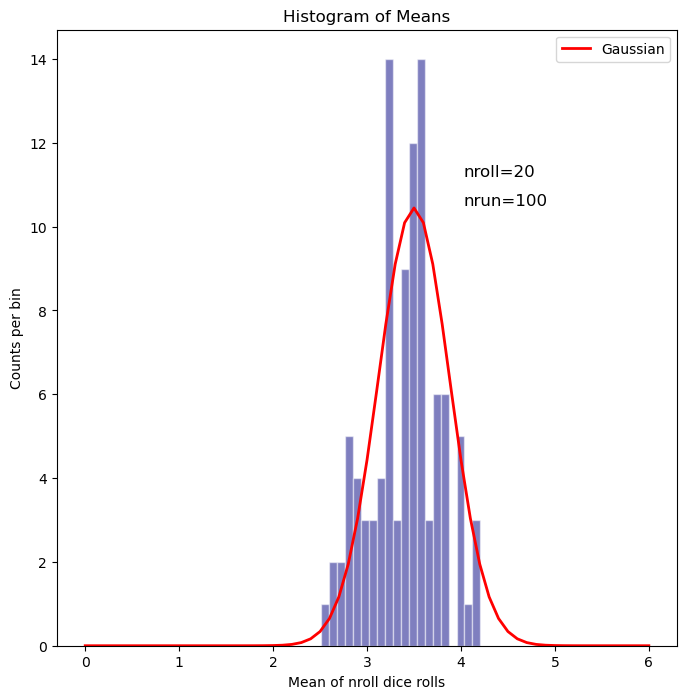

In [17]:


# Assuming you have 'hist', 'edges', 'nroll', 'nrun', 'x', 'y' defined before this point
# If not, you need to define these variables with appropriate values

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot histogram
ax.bar(edges[:-1], hist, width=np.diff(edges), color="navy", alpha=0.5, edgecolor="white")

# Annotate with values of nroll and nrun
hmax = np.amax(hist)
bmax = np.amax(edges)
s1 = 'nroll=' + str(nroll)
s2 = 'nrun=' + str(nrun)

ax.text(3.5 + 0.7 * (bmax - 3.5), 0.8 * hmax, s1, fontsize=12, color='black')
ax.text(3.5 + 0.7 * (bmax - 3.5), 0.75 * hmax, s2, fontsize=12, color='black')

# Plot Gaussian line
ax.plot(x, y * nrun, linewidth=2, color='red', label="Gaussian")

# Set labels and title
ax.set_xlabel('Mean of nroll dice rolls')
ax.set_ylabel('Counts per bin')
ax.set_title('Histogram of Means')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()


## CLT in action:  Building a Gaussian from Top Hats
Having run the simulation, we now tackle the problem from the PDFs

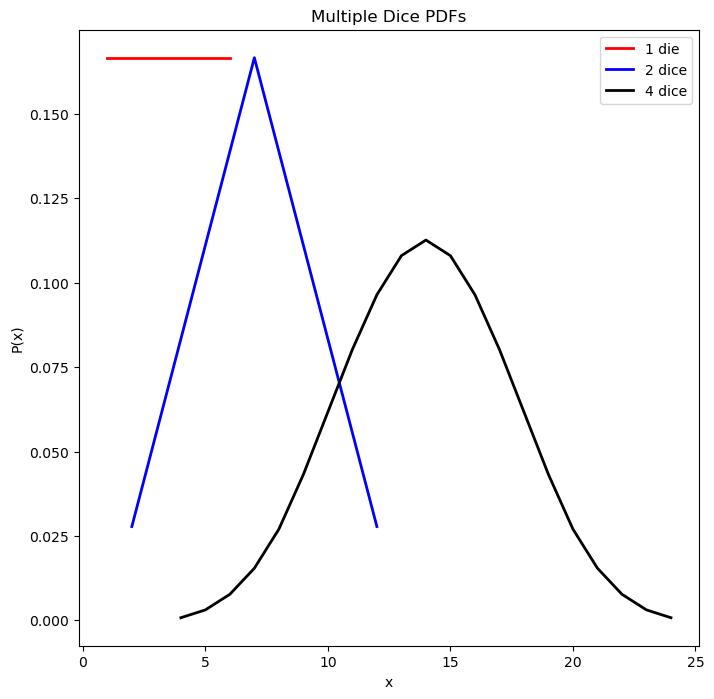

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot multiple dice PDFs
ax.plot(d1, p_d1, linewidth=2, color='red', label="1 die")
ax.plot(d2, p_d2, linewidth=2, color='blue', label="2 dice")
ax.plot(d4, p_d4, linewidth=2, color='black', label="4 dice")

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('P(x)')
ax.set_title('Multiple Dice PDFs')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()

## CLT in action:  Building a Gaussian from Harmonic Oscillators

As you should know, the wavefunction for a Harmonic oscillator is a Gaussian.  But maybe you never thought about the equivalent classical object, the probability of finding a harmonic oscillator at position x?   What is it: simply the amount of time $dt$ spent in between $x$ and $x+dx$:  

$$ P(x)\,dx\propto dt$$.

So that $$ P(x)\propto \left ( \frac{dx}{dt}\right )^{-1} = \frac{1}{A\pi\cos\omega t} = \frac{1}{\pi\sqrt{(A^2-x^2)}} $$

Let's plot that...


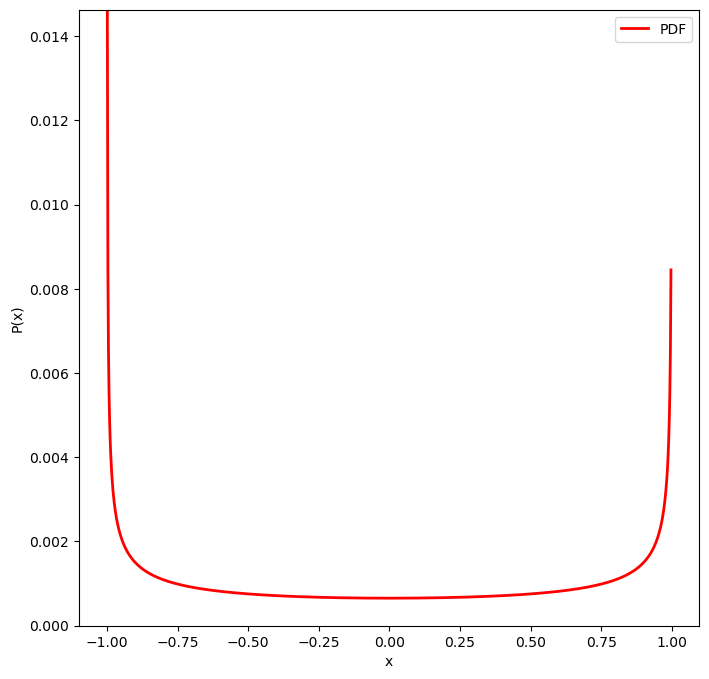

In [24]:
A=1
xmin=-0.999
xmax=0.999
x=np.arange(xmin,xmax,0.002)  
y=1/np.sqrt(A*A-x*x)
y=y/sum(y)
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Classical Harmonic Oscillator PDF
ax.plot(x, y, linewidth=2, color='red', label="PDF")

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('P(x)')

# Set y-axis limit to 0.1
ax.set_ylim(0, 0.1)

# Show legend
ax.legend()

# Set y-axis limit to 00.1
ax.set_ylim(0, max(y))


# Show the Matplotlib plot
plt.show()

Indeed, the probability density is infinite, and definitely not Gaussian! 

Now, suppose we combine multiple SHOs, representing adding the displacements of a set of springs.
We need to take the convolution and normalise.  Python is happy to do this for you, but look at the picture to convince yourself the integral $\int p(x)dx=1$  looks correct. Then check and understand how the normalisation is being done !

It doesn't take long before the Central limit theorem cuts in, and everything looks Gaussian.

Notice how the mode value of every individual oscillator is at its extreme displacement, but the mode for the sum is at zero.

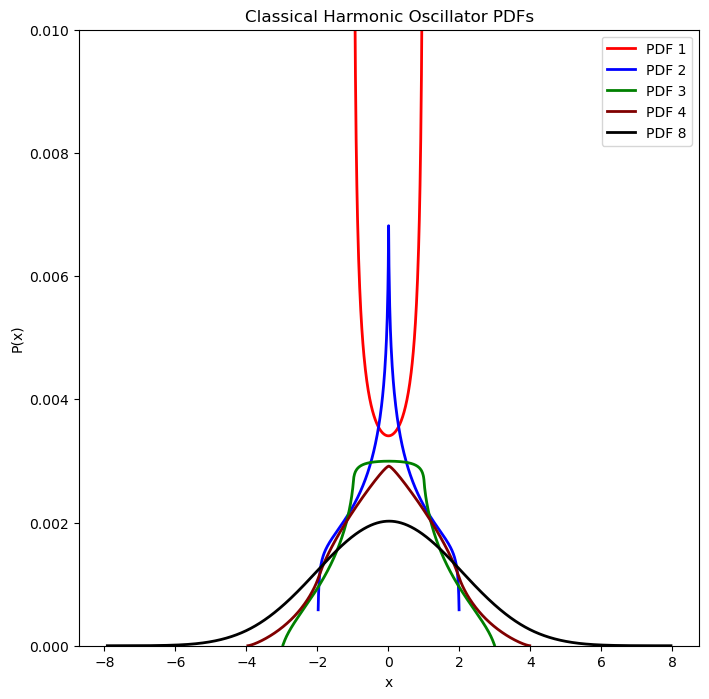

In [20]:
A=1
xmin=-0.99
xmax=0.995
x=np.arange(xmin,xmax,0.01)  
y=1/np.sqrt(A*A-x*x)
y=y/sum(y)
y2=np.convolve(y,y)
y2=y2/sum(y2)
x2=np.linspace(2*xmin,2*xmax,num=len(y2)) 
y3=np.convolve(y,y2)
y3=y3/sum(y3)
x3=np.linspace(3*xmin,3*xmax,num=len(y3)) 
y4=np.convolve(y2,y2)
y4=y4/sum(y4)
x4=np.linspace(4*xmin,4*xmax,num=len(y4)) 
y8=np.convolve(y4,y4)
y8=y8/sum(y8)
x8=np.linspace(8*xmin,8*xmax,num=len(y8)) 
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Classical Harmonic Oscillator PDFs
ax.plot(x, y, linewidth=2, color='red', label="PDF 1")
ax.plot(x2, y2, linewidth=2, color='blue', label="PDF 2")
ax.plot(x3, y3, linewidth=2, color='green', label="PDF 3")
ax.plot(x4, y4, linewidth=2, color='maroon', label="PDF 4")
ax.plot(x8, y8, linewidth=2, color='black', label="PDF 8")

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('P(x)')
ax.set_title('Classical Harmonic Oscillator PDFs')

# Show legend
ax.legend()

# Set y-axis limit to 00.1
ax.set_ylim(0, 0.01)

# Show the Matplotlib plot
plt.show()